In [ ]:
# 유방암 데이터 활용 emsmeble 분류실습 

### 목표
- sklearn에서 제공하는 유방암 데이터 셋을 활용하여 앙상블 모델을 만들어 보자 
- 악성, 양성 label을 이해해보자!

In [2]:
# 환경 셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer  # 유방암 데이터 불러와주기

In [3]:
# 변수 담기
cancer_data = load_breast_cancer()
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# 키 값들만 확인하기
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [12]:
# data 접근해보기
print(cancer_data.data)  # shape => ( 569,30)
# feature_names 특성이름 확인해보기
cancer_data.feature_names

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
# target 접근 해보기
print(cancer_data.target)  # 이진 분류하고 있음 클래스가 섞여있음(0과 1)
# target 실제 이름 확인해보기
print(cancer_data.target_names)  # 0은 malignant (악성) 1은 benign(양성)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [18]:
# 클래스별 개수
# np.bincount(cancer_data.target)
np.unique(cancer_data.target , return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

### 훈련용, 테스트용 분리

In [22]:
# cancer_data.data, cancer_data.target
# 훈련용 문제, 테스트 문제, 훈련용 답, 테스트 
X = cancer_data.data
y = cancer_data.target
# train_test_split(분리할 데이터, 테스트 크기 > 0.3, 랜덤 고정 값 >> 0)
X_train,X_test ,y_train,y_test = train_test_split(X,y, test_size= 0.3, random_state=0)
# 크기 확인
print('훈련용 : ', X_train.shape)
print('훈련용 : ' , y_train.shape)
print('테스트용 : ',X_test.shape)
print('테스트용 : ',y_test.shape)

훈련용 :  (398, 30)
훈련용 :  (398,)
테스트용 :  (171, 30)
테스트용 :  (171,)


#### 랜덤포레스트(RandomForest ,RF) 모델
 - 하이퍼 파라미터 : 몇개의 트리를 만들지 선택 => n_estmators
 - estimators : 예측기, 모델
 - 단일 결정 트리 모델에서와 마찬가지로 max_depth 등의 사전 가지치기 기능 사용가능
 - 회귀와 분류 모두 사용가능 

In [24]:
# 모델 임포트
from sklearn.ensemble import RandomForestClassifier # 분류모델

# rf 모델 생성(매개변수, hyperparameter)
# n_estimators => 예측기의 개수
forest_model = RandomForestClassifier(n_estimators= 100,random_state=10)

# 학습
# fit (훈련용 데이터)
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=10)

In [29]:
# 모델의 일반화 성능 정도는 어떻게 될까?
# 확인하는 방ㅂ버 >> 여러번 test데이터를 교차하며 평가
# 교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(forest_model,X_train,y_train,cv = 5)
result # 학습하고 예측하기 쉬운 데이터일 수 있음(sklearn 학습용 데이터라서)
        # 정확도가 높을 수 있음

array([0.9875    , 0.925     , 0.95      , 0.93670886, 0.94936709])

In [34]:
# 모델 평가 함수
# train 정확도
train_acc = forest_model.score(X_train,y_train)
# test 정확도
test_acc = forest_model.score(X_test,y_test)
print('훈련 정확도' , train_acc)
print('테스트 정확도' , test_acc)

훈련 정확도 1.0
테스트 정확도 0.9649122807017544


In [ ]:
# rf > 예측기 100개 설정해둔 상황
# 과대적합 제어하는 하이퍼 파라미터 별도 설정을 X
# 테스트 정확도 + 교차검증 결과가 상당히 좋은 상태 > 학습 평가 하기에 수월한 데이터
# 혹시라도 과대적합을 제어하고, 예측기의 개수를 조정하고 싶을때,
#  하이퍼 파라미터 값의 좋은 조합을 찾고 싶을 때
# 위에 내용을 알아서 찾아주는 도구(기능)

### 그리드 서치(GridSearchCV)를 적용
- 모델의 최적의 하이퍼파라미터 찾기
- 최적의 파라미터를 찾고 모델의 성능을 향상시킬 수 있다.
- 알아서 이 친구가 자동으로 돌리면서 최적의 하이퍼 파라미터를 찾는다

In [35]:
from sklearn.model_selection import GridSearchCV
# 최적의 하이퍼파라미터를 찾기위해 내부적으로 교차검증을 거치게됨
# 튜닝할 매개변수 정의 , 경우의 수 입력
# 이 중에서 가장 최적의 조합을 찾아서 출력을 해주라! 해서 이렇게 보기를 준거임
parmas = {'n_estimators': [50,70,100], 
            'max_depth' : [3,5,7],
            'max_leaf_nodes' : range(2,7),
            'min_samples_split' : [3,5,7]}

# 임의의 모델
model = RandomForestClassifier(random_state=10)
# 그리드 서치 객체 생성
# grid = GridSearchCV(모델명,파라미터,교차검증,평가 지표)
grid = GridSearchCV(model,parmas,cv = 5,scoring='accuracy' )
# 그리드 서치 실행(학습), 매개변수가 많을 수록 시간이 오래 걸리 수 있음
# 학습/교차검증시 train훈련 데이터 사용!!
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': range(2, 7),
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 70, 100]},
             scoring='accuracy')

In [1]:
# 가장 높은 성능일 때의 모델에 대한 하이퍼 파라미터 조합 확인
print('최대성능:' , grid.best_score_)
print('최대성능일 떄의 파라미터 조합' , grid.best_params_)


NameError: name 'grid' is not defined

#### 모델 완성 및 영향력 높은 특성 확인

In [37]:
# rf 모델 객체 생성
best_rf_model = RandomForestClassifier(n_estimators=50,
                                        max_depth=3,
                                        max_leaf_nodes=5,
                                        min_samples_split=3,
                                        random_state=10)
best_rf_model.fit(X_train,y_train)

# 예측
best_rf_model.predict(X_test) # 악성, 양성 판별한 상황

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

features 
 [5.73630341e-02 7.68668575e-03 5.02883208e-03 4.44433746e-02
 3.72856228e-03 2.22158493e-03 3.22561731e-02 1.08206716e-01
 1.22327067e-03 6.42908731e-04 1.51490294e-02 0.00000000e+00
 3.00567441e-02 1.95039051e-02 0.00000000e+00 2.33381954e-04
 5.99317224e-03 3.63000929e-03 4.66612226e-04 0.00000000e+00
 9.58033775e-02 2.87468955e-03 9.72812640e-02 1.49200473e-01
 7.35420725e-03 1.10132689e-02 1.78260611e-02 2.64514222e-01
 3.67383097e-03 1.26246092e-02]


df1 
                  importances
mean radius         0.057363
mean texture        0.007687
mean perimeter      0.005029
mean area           0.044443
mean smoothness     0.003729


df2 
                       importances
worst concave points     0.264514
worst area               0.149200
mean concave points      0.108207
worst perimeter          0.097281
worst radius             0.095803


df3 
                       importances
worst concave points     0.264514
worst area               0.149200
mean concave points      0

<Axes: >

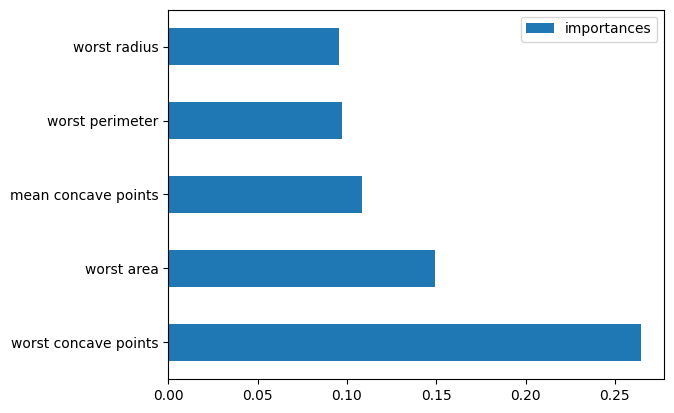

In [39]:
# feature_importances_를 이용하여 영향력 높은 모델의 특성 추출하기
features = best_rf_model.feature_importances_
print('features \n',features)  
print('\n') 

# 위가 넘파이 배열형식이라서 특성이 잘 안보임
# 그래서 넘파이로 나오는 친구들을 데이터 프레임으로 깔끔하게 출력을 시켜줌
# 영향력 높은 모델의 특성을 이용해서 데이터 프레임 생성하기
df1 = pd.DataFrame(features, index=cancer_data.feature_names, columns=['importances'])
print('df1 \n',df1.head()) # head 5개만 출력을 시키도록 해줌
print('\n')

# 생성된 데이터 프레임의 값을 '내림차순'으로 정리하기
df2 = df1.sort_values(by='importances', ascending=False)
print('df2 \n',df2.head())
print('\n')

df3 = df2.head()  # 중요도가 높은 특성 5개 df3에 저장
print("df3 \n",df3)

# DataFrame.plot.barh()함수를 이용한 시각화
df3.plot.barh()